# Heart Stoke Prediction

### Importing required libraries

In [4]:
import numpy as np
import pandas as pd 
from pandas import DataFrame 
from datetime import datetime
from dateutil.relativedelta import relativedelta #used to represent intervals of timeframe
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns 

In [5]:
import warnings
warnings.filterwarnings('ignore') 

In [6]:
data_stroke = pd.read_csv("healthcare_Stroke_dataset.csv")
data_stroke.head()

,id,gender,age,hypertension,heart_disease,Marital_Status,Work Profile,Residence_type,avg_glucose_level,BMI,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [7]:
data_stroke.isnull().sum() #null values for each of the feature variables

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
Marital_Status           0
Work Profile             0
Residence_type           0
avg_glucose_level        0
BMI                   1462
smoking_status       13292
stroke                   0
dtype: int64

### EDA on dataset

<AxesSubplot:>

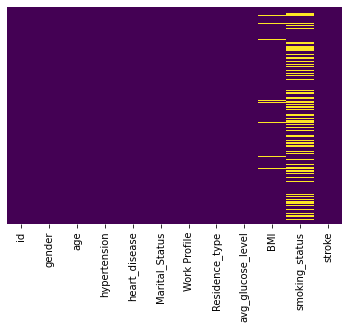

In [8]:
sns.heatmap(data_stroke.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

A countplot shows the counts of observations in each categorical bin using bars.

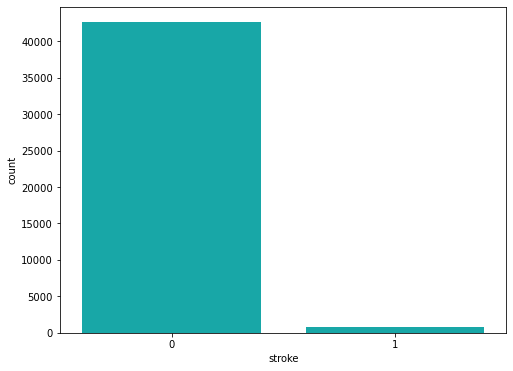

In [9]:
Plot = plt.subplots(figsize=(8, 6))
sns.countplot(x="stroke", data=data_stroke, color="c")
plt.show()

As we can see from the plot that this is a highly imbalanced dataset with the count of patients having stroke being a very minute fraction of the entire dataset.

Text(0.5, 1.0, ' Probability density of patients with or without stroke on the range of ages')

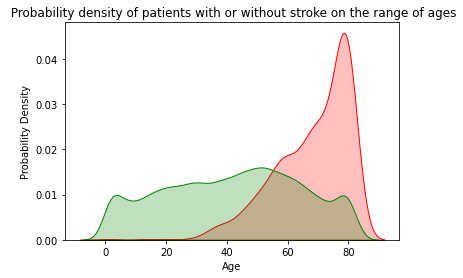

In [10]:
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==1), 
            'age'], color='r', shade=True, label='Stroke') 
  
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==0),  
            'age'], color='g', shade=True, label='No Stroke') 
  
plt.xlabel('Age') 
plt.ylabel('Probability Density') 
plt.title(' Probability density of patients with or without stroke on the range of ages')

This density estimate plot compares the probability density of patients with or without stroke on the range of ages

Text(0.5, 1.0, ' Probability density of patients with or without stroke on the range of Glucose level')

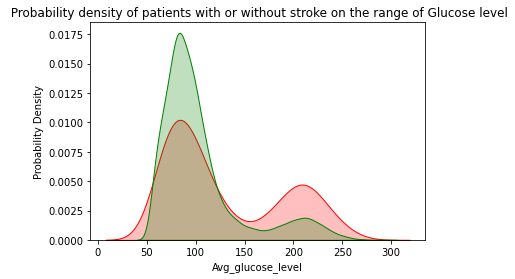

In [11]:
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==1), 
            'avg_glucose_level'], color='r', shade=True, label='Stroke') 
  
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==0),  
            'avg_glucose_level'], color='g', shade=True, label='No_Stroke') 
  
plt.xlabel('Avg_glucose_level') 
plt.ylabel('Probability Density') 
plt.title(' Probability density of patients with or without stroke on the range of Glucose level')

This density estimate plot compares the probability density of patients with or without stroke on the range of Average glucose levels.

Text(0.5, 1.0, ' Probability density of patients with or without stroke on the range of BMI')

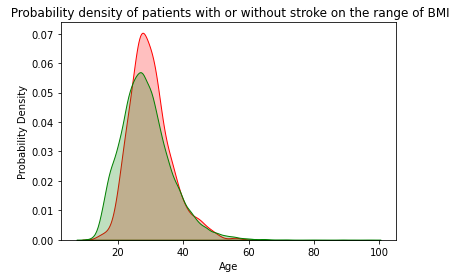

In [12]:
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==1), 
            'BMI'], color='r', shade=True, label='Stroke') 
  
sns.kdeplot(data_stroke.loc[(data_stroke['stroke']==0),  
            'BMI'], color='g', shade=True, label='No Stroke') 
  
plt.xlabel('Age') 
plt.ylabel('Probability Density') 
plt.title(' Probability density of patients with or without stroke on the range of BMI')

This density estimate plot compares the probability density of patients with or without stroke on the range of BMI.

### Handling Missing Data

In [13]:
data_stroke['BMI'].fillna(data_stroke['BMI'].mean(),inplace=True) #Filling the missing values of BMI with the mean values 

### Handling the Categorical columns

In [14]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
labelEncoder = LabelEncoder()
data_stroke['gender'] = labelEncoder.fit_transform(data_stroke['gender'])
data_stroke['Marital_Status'] = labelEncoder.fit_transform(data_stroke['Marital_Status'])
data_stroke['Work Profile'] = labelEncoder.fit_transform(data_stroke['Work Profile'])
data_stroke['Residence_type'] = labelEncoder.fit_transform(data_stroke['Residence_type'])
data_stroke.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
Marital_Status           0
Work Profile             0
Residence_type           0
avg_glucose_level        0
BMI                      0
smoking_status       13292
stroke                   0
dtype: int64

In [15]:
print(data_stroke.smoking_status.value_counts())
print(data_stroke[data_stroke.smoking_status.isnull()]['stroke'].value_counts())

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64
0    13147
1      145
Name: stroke, dtype: int64


Dropping the smoking_status column , Since 30% of data is missing

In [16]:
data_stroke.drop('smoking_status',axis = 1, inplace = True)

Patient ID column has no use in this Logistic Regression Prediction,so we will drop it.

In [17]:
data_stroke.drop('id',axis = 1, inplace = True)

In [18]:
data_stroke.head()

,gender,age,hypertension,heart_disease,Marital_Status,Work Profile,Residence_type,avg_glucose_level,BMI,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,0
1,1,58.0,1,0,1,2,1,87.96,39.2,0
2,0,8.0,0,0,0,2,1,110.89,17.6,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0
4,1,14.0,0,0,0,1,0,161.28,19.1,0


In [19]:
data_stroke

,gender,age,hypertension,heart_disease,Marital_Status,Work Profile,Residence_type,avg_glucose_level,BMI,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,0
1,1,58.0,1,0,1,2,1,87.96,39.2,0
2,0,8.0,0,0,0,2,1,110.89,17.6,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0
4,1,14.0,0,0,0,1,0,161.28,19.1,0
...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,4,1,58.64,20.4,0
43396,0,56.0,0,0,1,0,1,213.61,55.4,0
43397,0,82.0,1,0,1,2,1,91.94,28.9,0
43398,1,40.0,0,0,1,2,1,99.16,33.2,0


In [20]:
data_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
Marital_Status       0
Work Profile         0
Residence_type       0
avg_glucose_level    0
BMI                  0
stroke               0
dtype: int64

In [21]:
data_stroke.describe()

,gender,age,hypertension,heart_disease,Marital_Status,Work Profile,Residence_type,avg_glucose_level,BMI,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.408894,42.217894,0.093571,0.047512,0.643733,2.185438,0.501290,104.482750,28.605038,0.018041
std,0.492151,22.519649,0.291235,0.212733,0.478901,1.093158,0.500004,43.111751,7.638023,0.133103
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.540000,23.400000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.580000,28.100000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,112.070000,32.600000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,97.600000,1.000000


<Figure size 6400x4800 with 0 Axes>

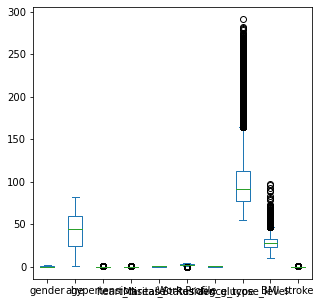

In [22]:
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (5,5)
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

data_stroke.plot(kind='box')
plt.show()

We will keep the outliers for Average glucose level and BMI because if we have these then only peple are getting strokes.

#### UnderSampling technique

Since the dataset is imbalanced , the undersampling technique have been used in order to balance the data

In [23]:
data_shuffled = data_stroke.sample(frac=1,random_state=4)
df_Isstroke = data_stroke.loc[data_stroke['stroke'] == 1]
df_Nostroke = data_stroke.loc[data_stroke['stroke'] == 0].sample(n= 4500,random_state= 101)

In [24]:
df_data_stroke = pd.concat([df_Isstroke,df_Nostroke]) 
df_data_stroke.stroke.value_counts()

0    4500
1     783
Name: stroke, dtype: int64

### Split the data as train and test

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
df_data_stroke = shuffle(df_data_stroke)
X = df_data_stroke.drop('stroke', axis = 1)
y = df_data_stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [26]:
print('X Train dataset shapes',X_train.shape)
print('Y Train dataset shapes',y_train.shape)
print('X Test dataset shapes',X_test.shape)
print('Y Test dataset shapes',y_test.shape)

X Train dataset shapes (3698, 9)
Y Train dataset shapes (3698,)
X Test dataset shapes (1585, 9)
Y Test dataset shapes (1585,)


### Training Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(C=5.0,random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(C=5.0, random_state=42)

In [29]:
y_pred = lr.predict(X_test) 

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
print(classification_report(y_test,y_pred))
lr.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1349
           1       0.50      0.25      0.33       236

    accuracy                           0.85      1585
   macro avg       0.69      0.60      0.63      1585
weighted avg       0.82      0.85      0.83      1585



0.8517350157728707

In [32]:
print(confusion_matrix(y_test,y_pred))

[[1291   58]
 [ 177   59]]


Text(0.5, 1.0, 'Logistic Regression \n Confusion Matrix')

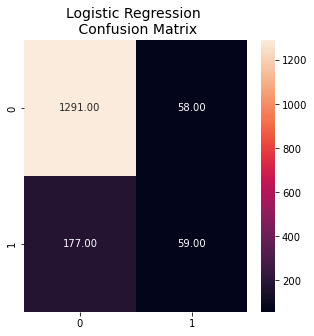

In [33]:
from sklearn import metrics
sns.heatmap(confusion_matrix(y_test,y_pred), annot= True, fmt=".2f")
plt.title('Logistic Regression \n Confusion Matrix', fontsize=14)

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print(roc_auc_score(y_test, y_pred))

0.6035025945144551


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.87027027 0.86756757 0.89189189 0.85945946 0.83513514 0.82702703
 0.85405405 0.84594595 0.86449864 0.85365854]


In [36]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.827027027027027, 0.8569508532923168, 0.8918918918918919)

In [37]:
test_stroke = y_test.values
for i in range(0, len(test_stroke)):
    if y_pred[i] == test_stroke[i]:
        print ('Predicted: {0} Actual:{1}'.format( y_pred[i], test_stroke[i])) #Displays the correct prediction values
    else:
        print('Wrong Prediction')
        print ('Predicted: {0} Actual:{1}'.format( y_pred[i], test_stroke[i])) #Displays the wrong prediction values 

Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 1 Actual:1
Wrong Prediction
Predicted: 0 Actual:1
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 1 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Predicted: 0 Actual:0
Wrong Prediction
Predicted: 0 Actual:1
Predicted: 0 Actual:0
Predicted: 0 Actua

In [38]:
total_cases = len(test_stroke)
print('Total cases',total_cases)
n=0
for i in range(0, len(test_stroke)):
    if  y_pred[i] == test_stroke[i]:
        n+=1
print('Correct predictions',n)
print('Percentage of correct predictions',(n/len(test_stroke))*100)

Total cases 1585
Correct predictions 1350
Percentage of correct predictions 85.17350157728707


In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,  y_pred))
print('MSE:', metrics.mean_squared_error(y_test,  y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,  y_pred)))

MAE: 0.14826498422712933
MSE: 0.14826498422712933
RMSE: 0.3850519240662606


In [40]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8604651162790697


In [41]:
# accuracy on test data
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8517350157728707


In [42]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [[ 0.18331758  0.07277517  0.14862983  0.83716529 -0.39684318 -0.04728402
   0.10369208  0.00575887 -0.01830993]]
Intercept: [-5.83032115]
Mean squared error (MSE): 0.15
Coefficient of determination (R^2): -0.17


### Using Tpot Classifier

In [44]:
from tpot import TPOTClassifier

In [45]:
# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5, #number of iterations to run ; pipeline optimisation process ; by default value is 100
    population_size=20, #number of individuals to retrain in the genetic programing popluation in every generation, by default value is 100
    verbosity=2, #it will state how much info TPOT will communicate while it is running
    scoring='roc_auc', #use to evaluate the quality of given pipeline
    random_state=20,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict(X_test))
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8561733228121515

Generation 2 - Current best internal CV score: 0.8565926278674064

Generation 3 - Current best internal CV score: 0.8565926278674064

Generation 4 - Current best internal CV score: 0.8565926278674064

Generation 5 - Current best internal CV score: 0.8565926278674064

Best pipeline: LogisticRegression(MinMaxScaler(input_matrix), C=20.0, dual=False, penalty=l2)

AUC score: 0.5933

Best pipeline steps:
1. MinMaxScaler()
2. LogisticRegression(C=20.0, random_state=20)


As we can see by using Tpot Classifier we didn't get much difference in auc score, hence we are on logistic regression yet.

### Training Decision Tree Classifier Model

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred1 = dt.predict(X_test) 
print(classification_report(y_test,y_pred1))
dt.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1349
           1       0.34      0.38      0.36       236

    accuracy                           0.80      1585
   macro avg       0.61      0.62      0.62      1585
weighted avg       0.81      0.80      0.80      1585



0.7981072555205048

### Training Random Forest Classifier Model

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred2 = rf.predict(X_test) 
print(classification_report(y_test,y_pred2))
rf.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1349
           1       0.43      0.26      0.32       236

    accuracy                           0.84      1585
   macro avg       0.65      0.60      0.61      1585
weighted avg       0.81      0.84      0.82      1585



0.8378548895899054

### Training Support Vector Classifier Model

In [52]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [53]:
y_pred3 = sv.predict(X_test) 
print(classification_report(y_test,y_pred3))
sv.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1349
           1       0.00      0.00      0.00       236

    accuracy                           0.85      1585
   macro avg       0.43      0.50      0.46      1585
weighted avg       0.72      0.85      0.78      1585



0.8511041009463722

### Training KNeighbors Classifier Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
y_pred4 = knn.predict(X_test) 
print(classification_report(y_test,y_pred4))
knn.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1349
           1       0.41      0.26      0.32       236

    accuracy                           0.83      1585
   macro avg       0.65      0.60      0.61      1585
weighted avg       0.81      0.83      0.82      1585



0.8347003154574133

### Using Stacking Classifier

In [59]:
def get_stacking():
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('dt', DecisionTreeClassifier()))
    level0.append(('rf', RandomForestClassifier()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=None)
    return model

In [60]:
from sklearn.ensemble import StackingClassifier
HybridModel = get_stacking()
HybridModel.fit(X_train,y_train)

y_expect = y_test
y_pred5 = HybridModel.predict(X_test)

print(metrics.classification_report(y_expect,y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1349
           1       0.45      0.17      0.25       236

    accuracy                           0.84      1585
   macro avg       0.66      0.57      0.58      1585
weighted avg       0.81      0.84      0.81      1585



In [61]:
accuracy_sc = accuracy_score(y_test, y_pred5)
print(accuracy_sc*100)

84.4794952681388


So will be taking Logistic Regession as final model because it gave best accuracy among all.

### StatsModel api- LogisticRegression

In [62]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)

In [63]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.343583
         Iterations 7


In [64]:
print(result.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.180      
Dependent Variable: stroke           AIC:              2559.1363  
Date:               2022-05-13 14:16 BIC:              2615.0762  
No. Observations:   3698             Log-Likelihood:   -1270.6    
Df Model:           8                LL-Null:          -1549.8    
Df Residuals:       3689             LLR p-value:      2.0574e-115
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender             0.0311   0.1037   0.3002 0.7640 -0.1722  0.2345
age                0.0499   0.0032  15.4514 0.0000  0.0436  0.0562
hypertension       0.6339   0.1335   4.7476 0.0000  0.3722  0.8955
heart_disease      0.

### Extracting the significant variables from logit model

In [65]:
def get_significant_vars(lm):
    #Store the pvalues to corresponding columns
    df_p_vals = pd.DataFrame(lm.pvalues)
    df_p_vals['vars'] = df_p_vals.index
    df_p_vals.columns=['p_values','variables']
    return list(df_p_vals[df_p_vals['p_values']<=0.05]['variables'])

P value less than 0.05 implies the data is statistically significant. Hence only those feature variables are extracted

In [66]:
significant_var= get_significant_vars(result)
print(significant_var)

['age', 'hypertension', 'heart_disease', 'Marital_Status', 'Work Profile', 'avg_glucose_level', 'BMI']


### Saving the prediction

In [67]:
pred_report = pd.DataFrame(y_pred.tolist(),columns=["Heart_stroke"])
# saving the prediction
pred_report.to_csv("final_submission.csv")

### Pickling

In [68]:
import pickle

# Saving model to disk
pickle.dump(lr, open('model.pkl','wb'))

In [69]:
# Loading model to compare the results
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict([[1, 2, 42, 64,899,85,890,45,289]]))

[0]


### Building a Predictive System

In [70]:
input_data = (62,0,0,140,268,0,160,0,3.6)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
